In [263]:
# Dependencies and Setup
import pandas as pd
import pandas as pd
import requests
from pathlib import Path
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from numpy.random import normal
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
pd.options.mode.copy_on_write = True

In [249]:
# Save path to the data set as a variable.
data_file = Path("Resources/Natural_Disasters.csv")

# Read our data file with the Pandas library
natural_disasters_df = pd.read_csv(data_file)
natural_disasters_df

,ObjectId,Country,ISO2,ISO3,Country_Disasters,Unit,Source,CTS_Code,CTS_Name,F1980,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,Afghanistan,AF,AFG,Afghanistan - Drought,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,2,Afghanistan,AF,AFG,Afghanistan - Extreme temperature,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Afghanistan,AF,AFG,Afghanistan - Flood,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,1.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,4,Afghanistan,AF,AFG,Afghanistan - Landslide,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,3.0,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0
4,5,Afghanistan,AF,AFG,Afghanistan - Storm,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,922,United States,US,USA,United States - Flood,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,3.0,...,1.0,1.0,NaN,1.0,1.0,5.0,5.0,3.0,4.0,3.0
712,923,United States,US,USA,United States - Landslide,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0
713,924,United States,US,USA,United States - Storm,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,3.0,...,19.0,15.0,13.0,19.0,16.0,17.0,11.0,14.0,19.0,23.0
714,926,United States,US,USA,United States - Wildfire,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,1.0,...,8.0,9.0,10.0,9.0,10.0,15.0,15.0,15.0,17.0,25.0


In [250]:
# Remove extraneous column
Natural_disaster_reduced_df = natural_disasters_df.drop(columns=['ISO2', 'ISO3', 'ObjectId', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 'Unit', 'Source', 'CTS_Code', 'CTS_Name',
                                                                 ])
Natural_disaster_reduced_df.head()

,Country,Country_Disasters,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Afghanistan,Afghanistan - Drought,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,Afghanistan,Afghanistan - Extreme temperature,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan - Flood,NaN,3.0,2.0,NaN,NaN,2.0,1.0,2.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,Afghanistan,Afghanistan - Landslide,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,...,3.0,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0
4,Afghanistan,Afghanistan - Storm,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN


In [251]:
# Remove remaining rows with missing data
natural_disasters_cleaned_df = Natural_disaster_reduced_df.fillna(0)

natural_disasters_cleaned_df.head(10)

,Country,Country_Disasters,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Afghanistan,Afghanistan - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Afghanistan,Afghanistan - Extreme temperature,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Afghanistan - Flood,0.0,3.0,2.0,0.0,0.0,2.0,1.0,2.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,Afghanistan,Afghanistan - Landslide,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,3.0,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0
4,Afghanistan,Afghanistan - Storm,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
5,Afghanistan,Afghanistan - Wildfire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Albania,Albania - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Albania,Albania - Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Albania,Albania - Flood,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0
9,Albania,Albania - Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:

# rename columns:
natural_disasters_renamed_df = natural_disasters_cleaned_df.rename(columns={"ISO3":"Country_Code","Indicator":"Disasters",
                                                "F1980":"1980", "F1981":"1981", "F1982":"1982",
                                                "F1983":"1983","F1984":"1984","F1985":"1985",
                                                "F1986":"1986","F1987":"1987","F1988":"1988",
                                                "F1989":"1989","F1990":"1990","F1991":"1991","F1992":"1992",
                                                "F1993":"1993","F1994":"1994","F1995":"1995",
                                                "F1996":"1996","F1997":"1997","F1998":"1998",
                                                "F1999":"1999","F2000":"2000","F2001":"2001",
                                                "F2002":"2002","F2003":"2003","F2004":"2004",
                                                "F2005":"2005","F2006":"2006","F2007":"2007",
                                                "F2008":"2008","F2009":"2009","F2010":"2010",
                                                "F2011":"2011","F2012":"2012","F2013":"2013",
                                                "F2014":"2014","F2015":"2015","F2016":"2016",
                                                "F2017":"2017","F2018":"2018","F2019":"2019",
                                                 "F2020":"2020","F2021":"2021","F2022":"2022" })
natural_disasters_renamed_df.head(20)



,Country,Country_Disasters,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Afghanistan - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Afghanistan,Afghanistan - Extreme temperature,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Afghanistan - Flood,0.0,3.0,2.0,0.0,0.0,2.0,1.0,2.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,Afghanistan,Afghanistan - Landslide,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,3.0,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0
4,Afghanistan,Afghanistan - Storm,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
5,Afghanistan,Afghanistan - Wildfire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Albania,Albania - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Albania,Albania - Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Albania,Albania - Flood,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0
9,Albania,Albania - Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
# Set the 'Country Code' to be our index for easy referencing of rows
#natural_disasters_renamed_df = natural_disasters_renamed_df.set_index("Country")

In [229]:
# Collect the mean Natural disaster for the world
average_disasters = natural_disasters_renamed_df[[str(year) for year in range(1990, 2021)]].mean()

# Collect the years where data was collected
years = average_disasters.keys()

In [ ]:
# Plot the world average as a line chart
plt.figure(figsize=(20, 5))
world_avg, = plt.plot(years, average_disasters, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, natural_disasters_renamed_df.loc['United States - Extreme temperature',["1990","1991","1992","1993","1994","1995","1996",
                                                                                                       "1997","1998","1999","2000","2001","2002","2003",
                                                                                                       "2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",
                                                                  "2016","2017","2018","2019","2020"]]) 
                        #Color="green",label=natural_disasters_renamed_df.loc['United States',"Country"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

In [245]:
#average_unemployment.plot(label="World Average")
#combined_unemployed_data.loc['USA', "2010":"2020"].plot(label="United States")
#plt.legend()
#plt.show()

In [253]:
# Define the list of countries to search for
countries_to_search = ["China", "United States", "India", "Russian Federation", 
                   "Japan", "Canada",
                    "Germany", "Italy", "France",
                    "United Kingdom"]

# Initialize an empty list to store the rows to keep
rows_to_keep = []

# Iterate over the DataFrame rows
for index, row in natural_disasters_renamed_df.iterrows():
    for word in countries_to_search:
        if word == row['Country']:
            rows_to_keep.append(index)
            break  # Break out of the inner loop once a word is found

# Keep only the rows that contain the words in the list
filtered_country_df = natural_disasters_renamed_df.loc[rows_to_keep]
filtered_country_df

,Country,Country_Disasters,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
122,Canada,Canada - Drought,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
123,Canada,Canada - Extreme temperature,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0
124,Canada,Canada - Flood,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,5.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,7.0,9.0
125,Canada,Canada - Storm,0.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,...,5.0,5.0,5.0,6.0,7.0,7.0,7.0,8.0,8.0,8.0
126,Canada,Canada - Wildfire,0.0,0.0,1.0,1.0,2.0,2.0,3.0,2.0,...,8.0,8.0,8.0,9.0,10.0,11.0,13.0,15.0,16.0,18.0
146,China,China - Drought,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
147,China,China - Extreme temperature,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0
148,China,China - Flood,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,...,12.0,14.0,13.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
149,China,China - Landslide,0.0,1.0,0.0,1.0,1.0,1.0,4.0,2.0,...,1.0,3.0,2.0,1.0,3.0,4.0,4.0,3.0,4.0,4.0
150,China,China - Storm,11.0,5.0,8.0,11.0,5.0,6.0,8.0,5.0,...,8.0,15.0,16.0,17.0,13.0,12.0,12.0,13.0,13.0,14.0


In [208]:
#filtered_country_df.set_index("Country", inplace = True)

#filtered_country_df["Country_Disasters"] = filtered_country_df["Country"] + " " + filtered_country_df["Disasters"]

filtered_country_new_df = filtered_country_df.drop(columns=['Country'])
filtered_country_new_df


,Country_Disasters,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
122,Canada - Drought,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
123,Canada - Extreme temperature,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0
124,Canada - Flood,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,...,5.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,7.0,9.0
125,Canada - Storm,0.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,3.0,...,5.0,5.0,5.0,6.0,7.0,7.0,7.0,8.0,8.0,8.0
126,Canada - Wildfire,0.0,0.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,...,8.0,8.0,8.0,9.0,10.0,11.0,13.0,15.0,16.0,18.0
146,China - Drought,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
147,China - Extreme temperature,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0
148,China - Flood,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,8.0,...,12.0,14.0,13.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
149,China - Landslide,0.0,1.0,0.0,1.0,1.0,1.0,4.0,2.0,1.0,...,1.0,3.0,2.0,1.0,3.0,4.0,4.0,3.0,4.0,4.0
150,China - Storm,11.0,5.0,8.0,11.0,5.0,6.0,8.0,5.0,5.0,...,8.0,15.0,16.0,17.0,13.0,12.0,12.0,13.0,13.0,14.0


In [255]:
#filtered_country_new_df.set_index("Country_Disasters", inplace = True)
country_df = filtered_country_new_df.transpose()
country_df

Country_Disasters,Canada - Drought,Canada - Extreme temperature,Canada - Flood,Canada - Storm,Canada - Wildfire,China - Drought,China - Extreme temperature,China - Flood,China - Landslide,China - Storm,...,United Kingdom - Drought,United Kingdom - Extreme temperature,United Kingdom - Flood,United Kingdom - Storm,United States - Drought,United States - Extreme temperature,United States - Flood,United States - Landslide,United States - Storm,United States - Wildfire
1990,1.0,1.0,1.0,0.0,0.0,1.0,2.0,8.0,0.0,11.0,...,0.0,0.0,0.0,7.0,0.0,2.0,4.0,0.0,15.0,0.0
1991,1.0,1.0,1.0,1.0,0.0,1.0,2.0,8.0,1.0,5.0,...,0.0,1.0,0.0,1.0,2.0,0.0,14.0,0.0,17.0,0.0
1992,1.0,1.0,1.0,0.0,1.0,2.0,2.0,8.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0
1993,1.0,1.0,1.0,0.0,1.0,2.0,2.0,8.0,1.0,11.0,...,0.0,0.0,2.0,0.0,0.0,1.0,6.0,0.0,20.0,1.0
1994,1.0,1.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,9.0,2.0
1995,1.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,6.0,...,0.0,0.0,0.0,1.0,0.0,2.0,5.0,1.0,10.0,2.0
1996,1.0,1.0,2.0,2.0,3.0,2.0,2.0,8.0,4.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,9.0,3.0
1997,1.0,1.0,2.0,3.0,2.0,2.0,2.0,8.0,2.0,5.0,...,0.0,1.0,2.0,0.0,0.0,0.0,8.0,1.0,23.0,2.0
1998,1.0,1.0,3.0,3.0,3.0,2.0,2.0,8.0,1.0,5.0,...,0.0,0.0,1.0,3.0,0.0,1.0,7.0,1.0,20.0,3.0
1999,1.0,2.0,3.0,3.0,2.0,3.0,2.0,8.0,1.0,9.0,...,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,16.0,2.0


The r value is 0.9607018839631021


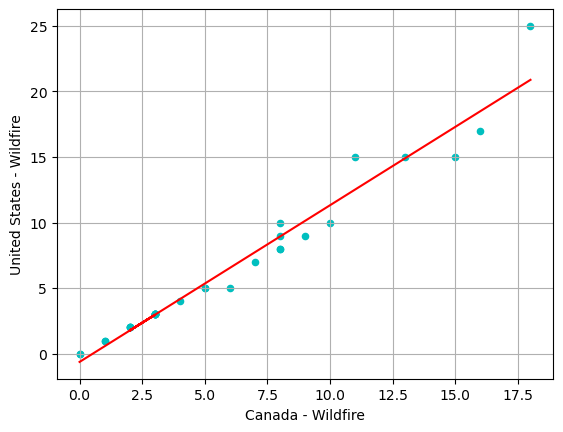

In [267]:
country_df.plot(x='Canada - Wildfire', y='United States - Wildfire', kind = 'scatter', 
           marker='o', color ='c',grid=True)

x_values = country_df['Canada - Wildfire']
y_values = country_df['United States - Wildfire']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x +" + str(round(intercept,6))

plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(80000,30000),fontsize=10,color="r")
#plt.savefig("Images/GDP_Medical_doctors_scatter.png")
print(f"The r value is {rvalue**2}")

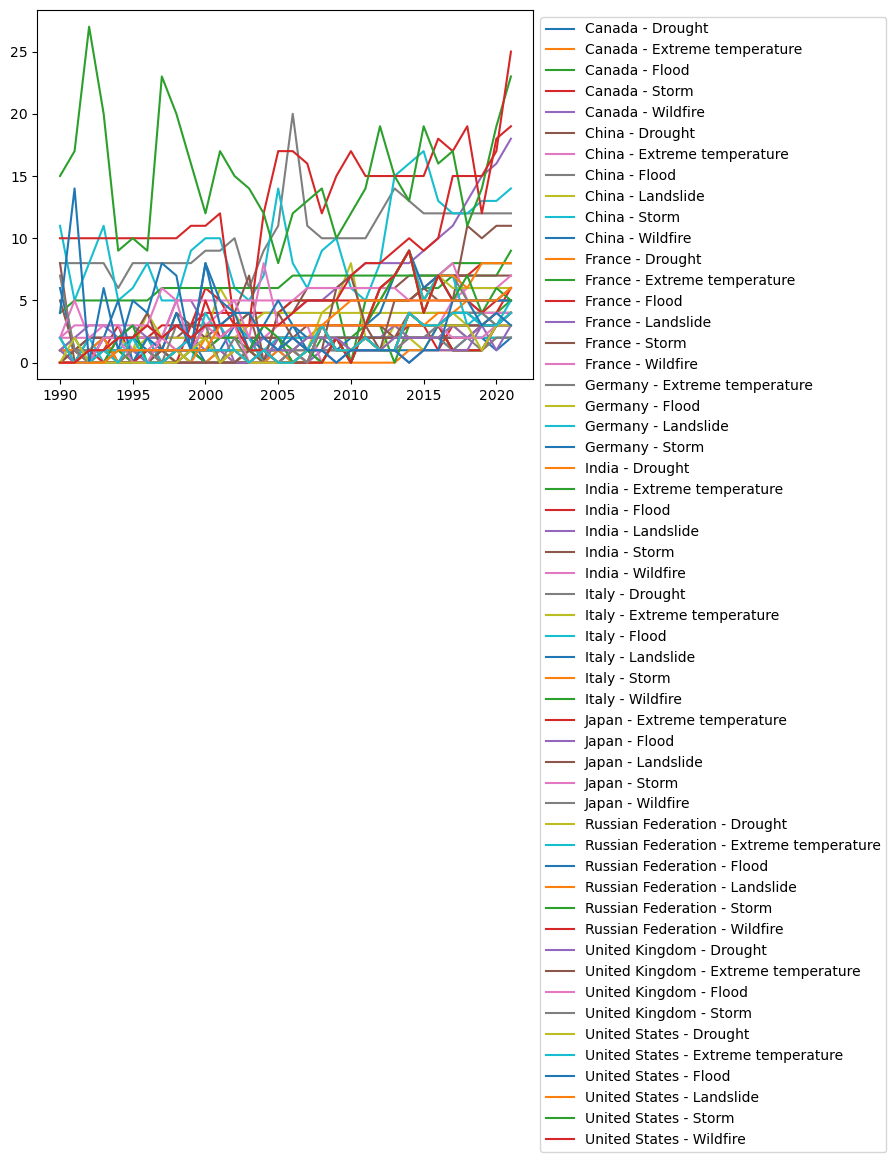

In [261]:
ax = country_df.plot()
ax.legend(loc="upper left", bbox_to_anchor = (1,1))

plt.show()

In [ ]:
# Plot Natural Disasters for different years and countries
plt.figure(figsize=(20, 5))
for country in filtered_country_df['Country'].unique():
    country_info = filtered_country_df[filtered_country_df['Country'] == country]
    plt.plot(country_info['Disasters'], country_info['2021'], label=country)

plt.xlabel('Disasters')
plt.ylabel('Year')
plt.title('Natural Disasters by Country')
plt.legend()
plt.show()